In [79]:
#using library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn import tree
from sklearn import metrics 
import warnings
from sklearn.metrics import accuracy_score

In [2]:
path = 'Clustered_Customer_Data.csv'
df = pd.read_csv(path)

In [3]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [7]:
df.shape

(8950, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,0.937207
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,0.976464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,1.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,1.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


In [11]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [12]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

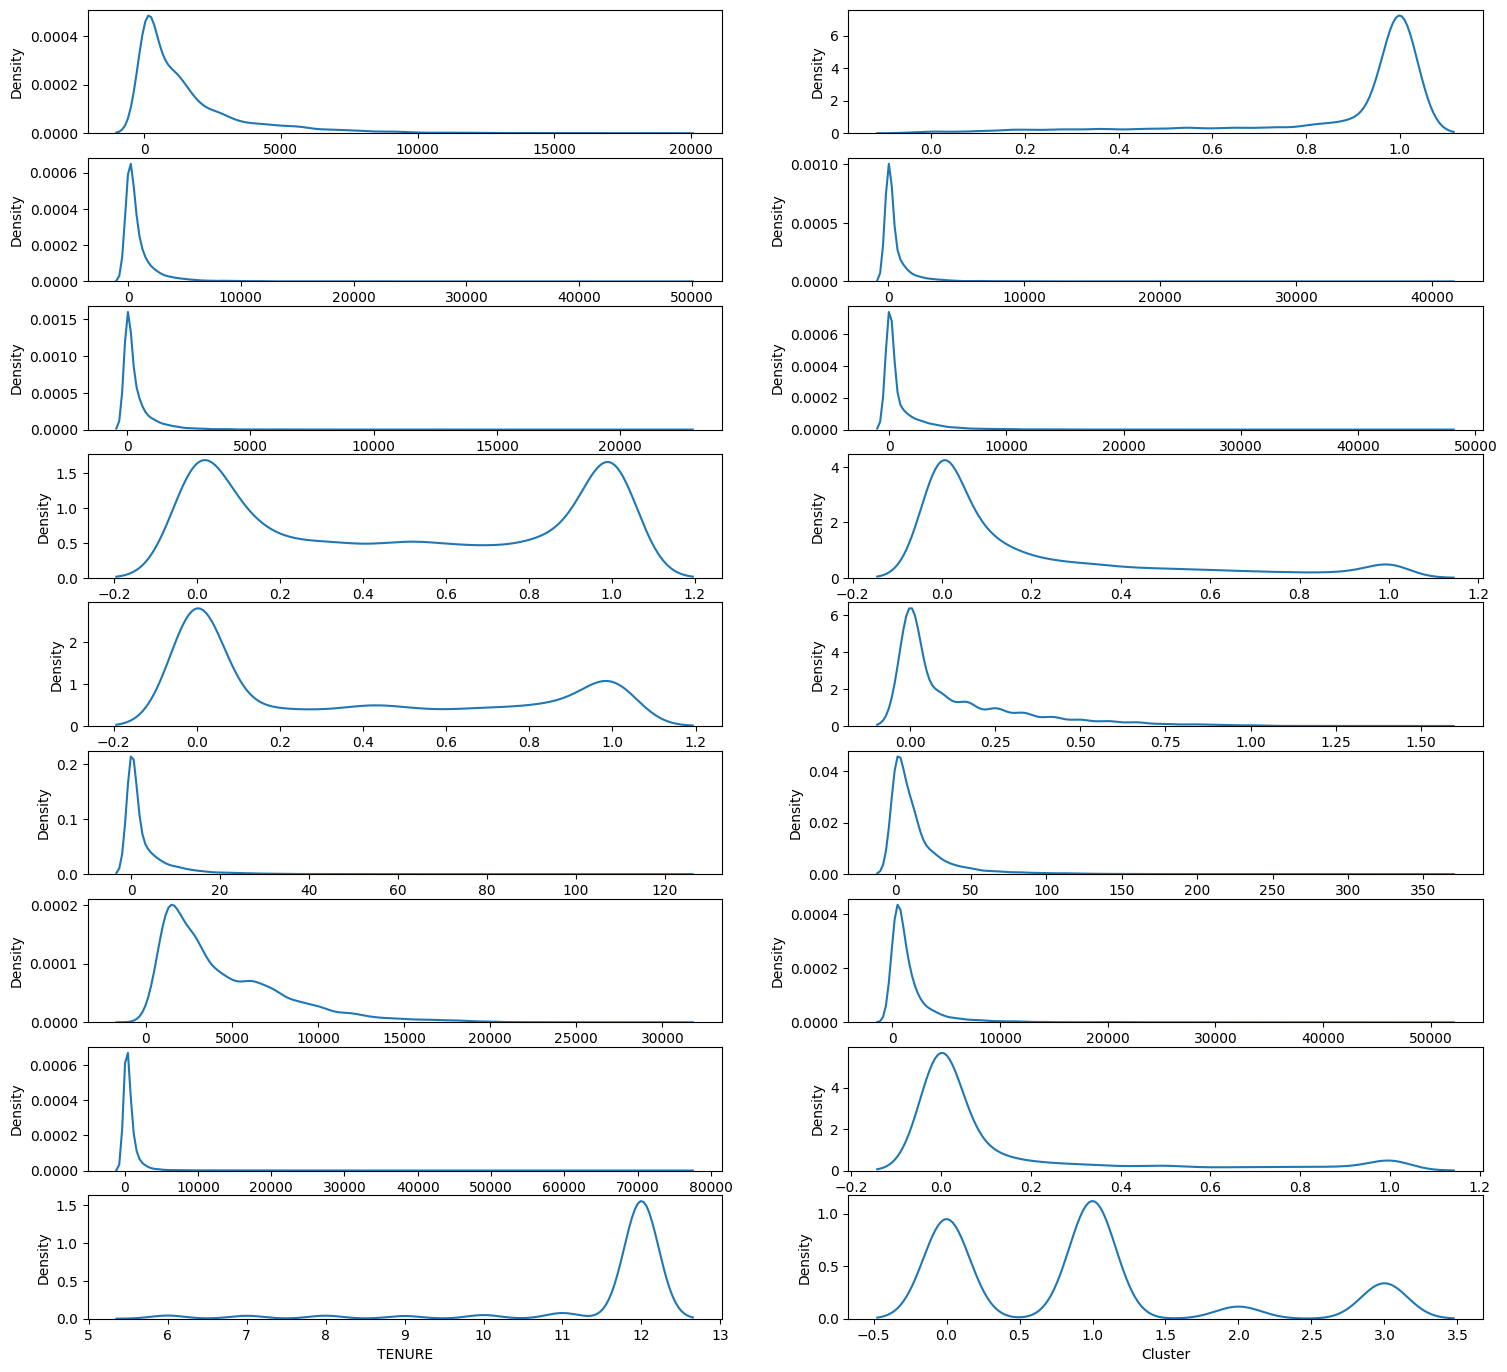

In [17]:
#plotting graph 

plt.figure(figsize=(18,17))
for i, col in enumerate(df.columns):
    if df[col].dtype != "object":
        ax = plt.subplot(9,2, i+1)
        sns.kdeplot(df[col], ax= ax)
        plt.xlabel(col)
plt.show()

C:\Users\ashve\AppData\Local\Temp\ipykernel_8216\4104566737.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={'color': 'g', 'bw' : 0.1,'lw' : 3,'label': 'KDE'}, hist_kws={'color':'y'})
C:\Users\ashve\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ashve\AppData\Local\Temp\ipykern

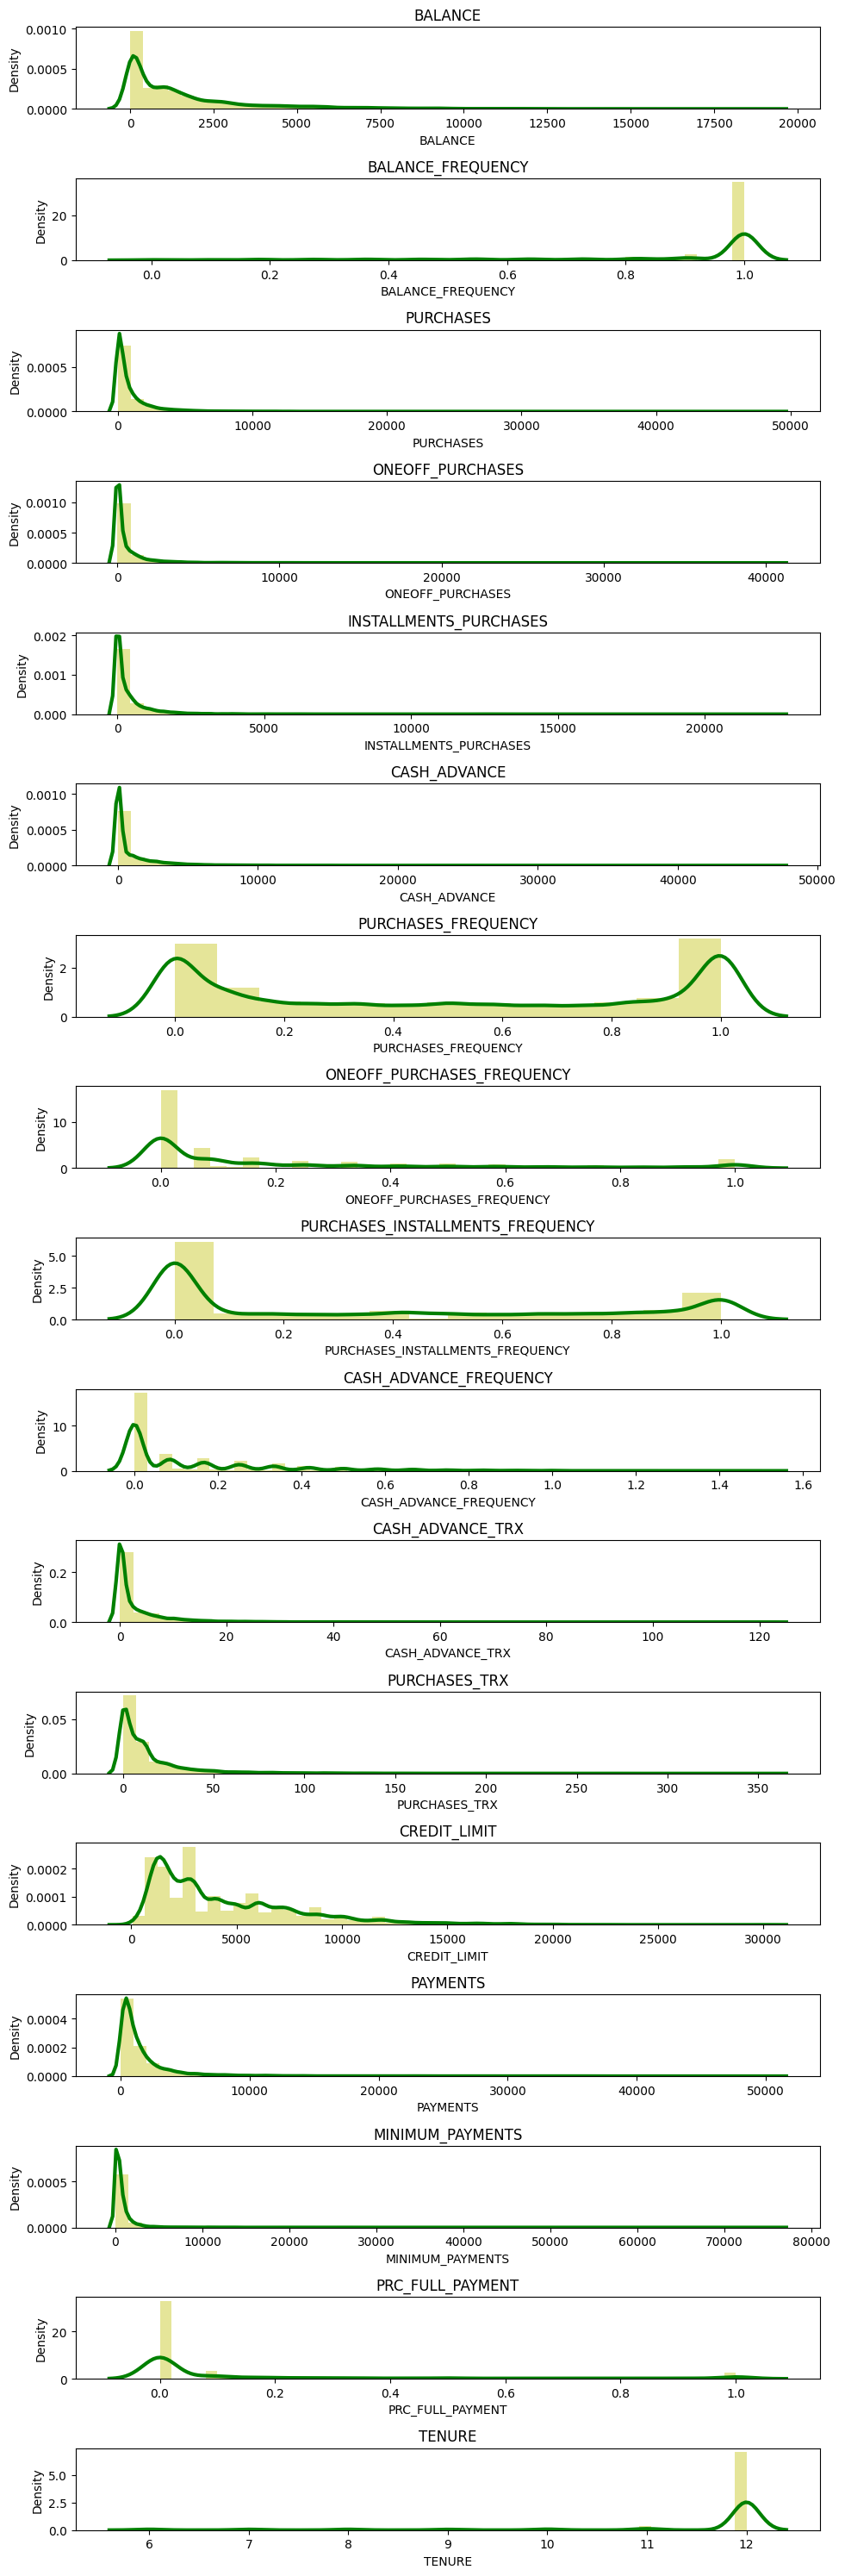

In [28]:
plt.figure(figsize= (10,30))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws={'color': 'g', 'bw' : 0.1,'lw' : 3,'label': 'KDE'}, hist_kws={'color':'y'})
    plt.title(df.columns[i])
plt.tight_layout()


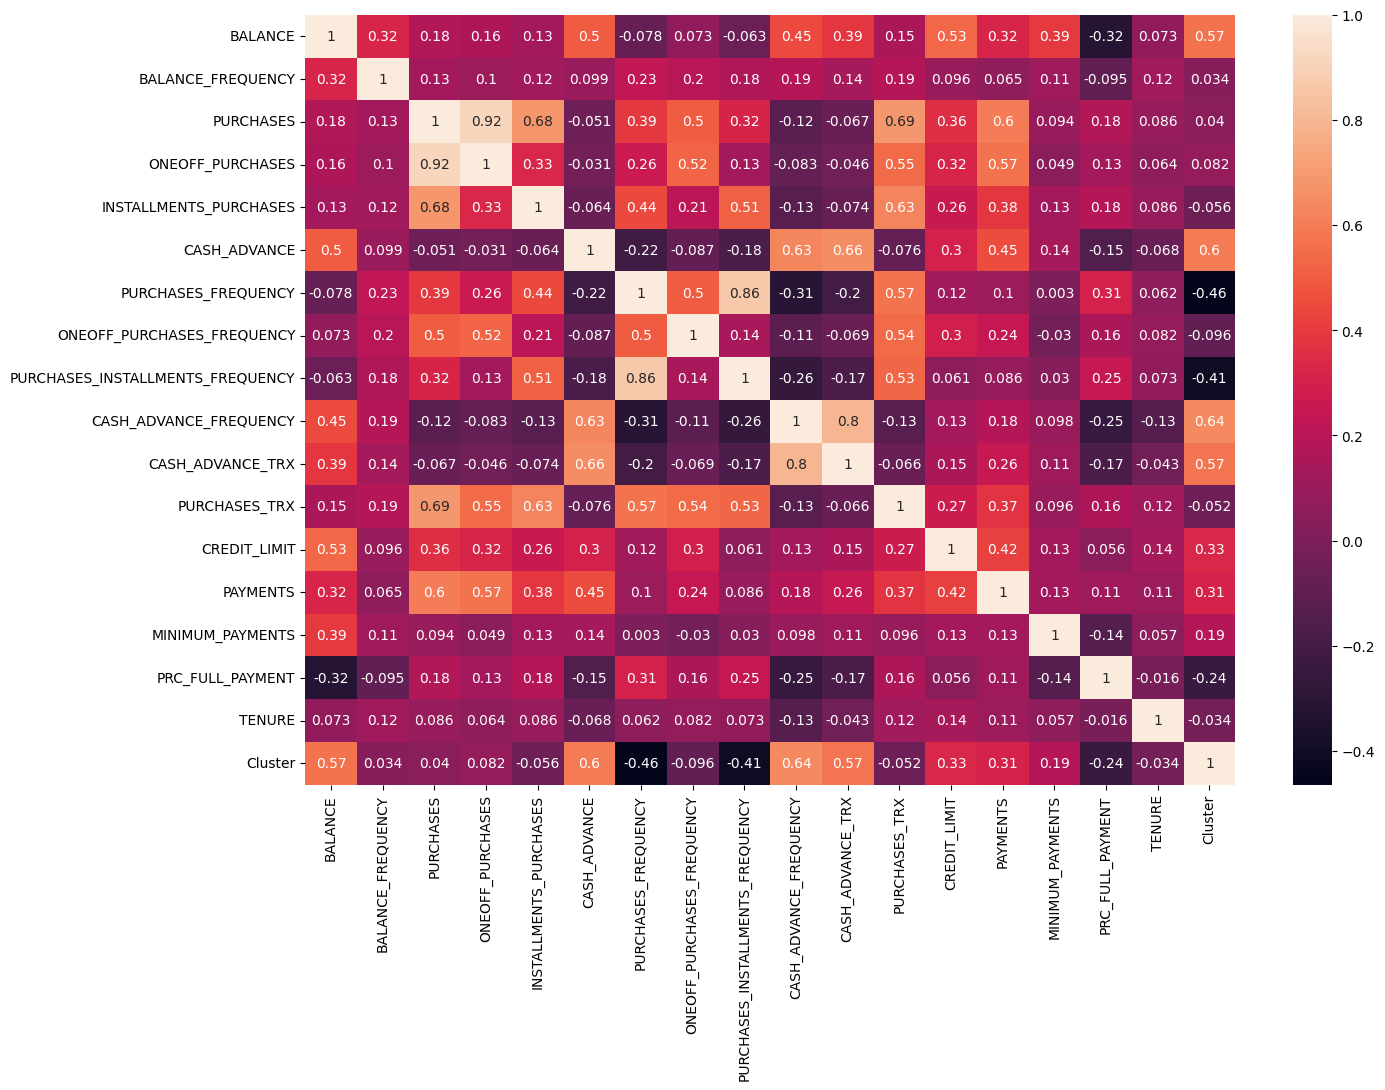

In [31]:
#mking heat map 

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True )
plt.show()

In [32]:
#feature scalling 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [33]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52555097,
         0.36067954,  0.06431041],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.2342269 ,
         0.36067954,  2.11263141],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.52555097,
         0.36067954, -0.95985008],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ...,  0.32919999,
        -4.12276757, -0.95985008],
       [-0.74517423, -0.18547673, -0.46955188, ...,  0.32919999,
        -4.12276757,  0.06431041],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.52555097,
        -4.12276757,  0.06431041]])

In [34]:
pca = PCA(n_components = 2 )
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principal_components , columns = ['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.548173,-1.171816
1,-1.623932,2.968912
2,1.100708,-0.615866
3,-0.886089,-0.005352
4,-1.509457,-0.818646
...,...,...
8945,-0.020690,-2.301498
8946,-0.263835,-2.005278
8947,-0.608338,-2.179382
8948,-2.247394,-0.869653


In [35]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean= KMeans(n_clusters = i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

C:\Users\ashve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ashve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ashve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ashve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

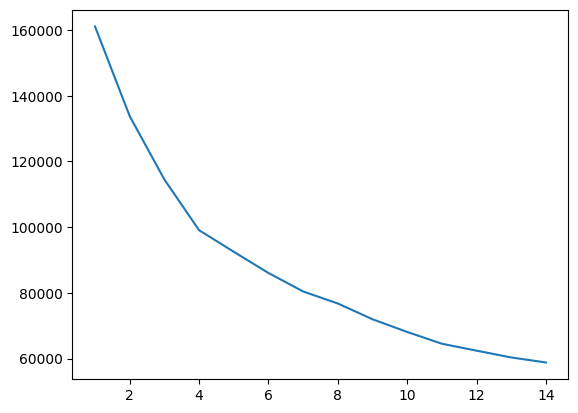

In [37]:
plt.plot(range_val,inertia)

In [40]:
#model building 

kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})], axis = 1)

C:\Users\ashve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
pca_df_kmeans

,pca1,pca2,cluster
0,-1.548173,-1.171816,0
1,-1.623932,2.968912,1
2,1.100708,-0.615866,2
3,-0.886089,-0.005352,0
4,-1.509457,-0.818646,0
...,...,...,...
8945,-0.020690,-2.301498,2
8946,-0.263835,-2.005278,2
8947,-0.608338,-2.179382,2
8948,-2.247394,-0.869653,0


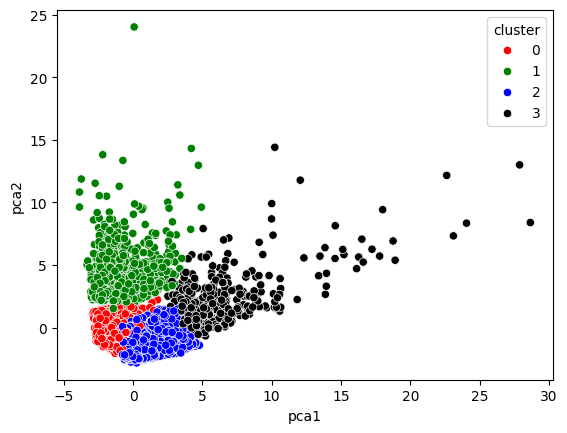

In [44]:
ax = sns.scatterplot(x = "pca1", y = "pca2", hue= "cluster", data = pca_df_kmeans, palette = ['red','green','blue','black'])
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your data
scalar = StandardScaler()
scalar.fit(df)  # Fit the scaler on your data

# Now you can use inverse_transform
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=df.columns)
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.columns)
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429,1.000000e+00
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312,3.000000e+00
2,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595,5.329071e-15
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100,2.000000e+00


In [49]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1,0


In [64]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [65]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [66]:
#Training and Testing the model accuracy using decision tree

#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8584,4696.525962,0.875000,604.33,435.00,169.33,6400.248453,0.500000,0.375000,0.125000,0.375000,7,5,8000.0,840.965985,930.049801,0.000000,8
1517,5363.715074,1.000000,118.41,118.41,0.00,4344.905863,0.083333,0.083333,0.000000,0.333333,6,1,7000.0,1965.923460,1870.760877,0.000000,12
7930,490.160040,1.000000,3530.93,2416.31,1114.62,0.000000,1.000000,0.750000,0.666667,0.000000,0,23,4000.0,2959.200535,219.112899,0.000000,12
118,54.933231,0.272727,495.00,0.00,495.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,7000.0,1969.845566,147.049952,1.000000,12
4853,43.203770,1.000000,308.22,0.00,308.22,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,2000.0,331.111373,162.258275,0.500000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,167.356680,1.000000,288.00,288.00,0.00,189.705758,0.083333,0.083333,0.000000,0.083333,1,3,6000.0,292.213876,168.244932,0.000000,12
4534,72.679836,0.545455,800.55,586.55,214.00,0.000000,0.500000,0.333333,0.333333,0.000000,0,13,7000.0,1584.897630,147.859998,0.666667,12
1495,1075.401912,1.000000,150.00,150.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,224.135558,443.646049,0.000000,12
3143,867.244416,1.000000,804.18,0.00,804.18,0.000000,0.416667,0.000000,0.416667,0.000000,0,10,3700.0,1175.286250,343.753509,0.000000,12


In [67]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8644,21.718289,1.000000,182.27,0.00,182.27,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,1500.0,176.130076,171.217707,0.375000,12
2613,3106.036183,1.000000,2128.56,1036.24,1092.32,2346.894867,0.916667,0.416667,0.750000,0.416667,8,27,7200.0,5564.776852,697.464133,0.000000,12
7462,68.624743,1.000000,423.23,243.23,180.00,0.000000,1.000000,0.111111,0.888889,0.000000,0,10,1000.0,458.251229,107.879849,0.500000,9
2457,862.481024,1.000000,2267.38,1674.75,592.63,282.991201,1.000000,1.000000,0.666667,0.166667,2,41,4500.0,3644.186477,341.586200,0.333333,12
2015,5919.198579,1.000000,9321.13,4678.79,4642.34,0.000000,1.000000,1.000000,1.000000,0.000000,0,171,15000.0,7303.897866,1395.715133,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,165.544411,0.818182,468.60,335.40,133.20,18.126683,1.000000,0.250000,1.000000,0.083333,1,15,1700.0,1389.092134,198.260864,0.000000,12
5754,6241.937842,1.000000,0.00,0.00,0.00,11071.933640,0.000000,0.000000,0.000000,0.333333,4,0,12000.0,12181.031390,1475.203723,0.090909,12
917,515.135703,1.000000,2457.48,1272.50,1184.98,0.000000,1.000000,0.583333,1.000000,0.000000,0,69,7000.0,2858.180367,177.692271,0.250000,12
4574,1998.155970,1.000000,348.00,348.00,0.00,1940.357907,0.083333,0.083333,0.000000,0.083333,1,1,9000.0,2893.195013,419.016946,0.000000,12


In [68]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
#Confusion_Matrix
# print(metrics.confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
print(y_test[:10])  # Print first 10 elements of y_true
print(y_pred[:10])

      Cluster  Cluster
8644        0        2
2613        0        2
7462        0        2
2457        0        2
2015        2        3
618         1        0
4546        0        2
736         1        0
5724        0        2
1094        1        0
[[0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 3]
 [1 0]
 [0 2]
 [1 0]
 [0 2]
 [1 0]]


In [ ]:
#*********************************************************END *************************

In [89]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1
